# Example of long-file splitting and analysis

## Load the Sample List

### Text File

In [1]:
import numpy as np
sample_list = np.genfromtxt('./sample_list.txt', dtype=str, delimiter='\n', comments='#')

In [2]:
sample_list

array(['NIST 612', 'NIST 612', 'NIST 610', 'jcp', 'jct', 'jct',
       'Sample_1', 'Sample_1', 'Sample_1', 'Sample_1', 'Sample_1',
       'Sample_2', 'Sample_2', 'Sample_2', 'Sample_3', 'Sample_3',
       'Sample_3', 'Sample_4', 'Sample_4', 'Sample_4', 'Sample_5',
       'Sample_5', 'Sample_5', 'Sample_5', 'Sample_5', 'Sample_5',
       'NIST 612', 'NIST 612', 'NIST 610', 'jcp', 'jct', 'jct'],
      dtype='<U8')

### Excel File

In [3]:
import pandas as pd
sample_list = pd.read_excel('./sample_list.xlsx')

In [4]:
sample_list

,Order,Samples
0,1,NIST 612
1,2,NIST 612
2,3,NIST 610
3,4,jcp
4,5,jct
5,6,jct
6,7,Sample_1
7,8,Sample_1
8,9,Sample_1
9,10,Sample_1


## Load and split the data file

In [5]:
import latools as la

# read in the long file, and split it into individual ablations
fig, ax = la.preprocessing.long_file('./long_data_file.csv', 
                                     dataformat='./long_data_file_format.json', 
                                     sample_list=sample_list.loc[:, 'Samples'])

Reading dataformat.json file...
Number of samples in list (32) does not match number of ablations (33).
  -> There are more ablations than samples...
     Removing data fragments to match sample list length.
       (Removed data fragments < 2 points long)
Success! File split into 32 sections.
New files saved to:
long_example/long_data_file_split/
   NIST 612.csv
   NIST 610.csv
   jcp.csv
   jct.csv
   Sample_1.csv
   Sample_2.csv
   Sample_3.csv
   Sample_4.csv
   Sample_5.csv
   NIST 612_1.csv
   NIST 610_1.csv
   jcp_1.csv
   jct_1.csv

Import the split files using the 'REPRODUCE' configuration.


## FAILURE!! How to deal with it?

Looking at the right-hand-side of the plot here, something is not right... There's a sudden drop in signal in the second-to-last ablation, which is making autorange identify them as two separate ablations.

We can fix this by asking it to smooth the signals before identifying signal and backgroudn regions. We do this by setting the `swin` parameter, which is passed directly to `autorange` for signal splitting.

In this case, I've set `swin=10`, as it seems to do a good job.

Reading dataformat.json file...
Success! File split into 32 sections.
New files saved to:
long_example/long_data_file_split/
   NIST 612.csv
   NIST 610.csv
   jcp.csv
   jct.csv
   Sample_1.csv
   Sample_2.csv
   Sample_3.csv
   Sample_4.csv
   Sample_5.csv
   NIST 612_1.csv
   NIST 610_1.csv
   jcp_1.csv
   jct_1.csv

Import the split files using the 'REPRODUCE' configuration.


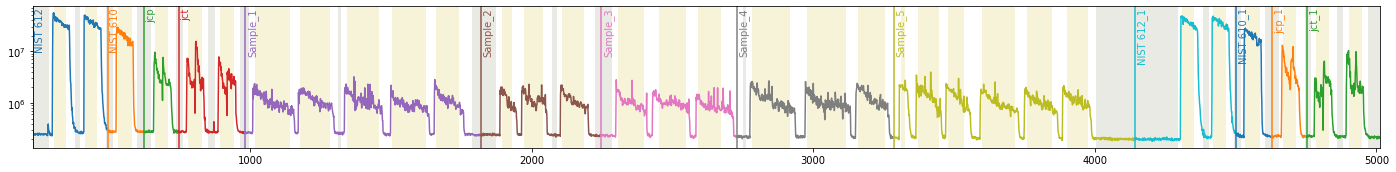

In [6]:
fig, ax = la.preprocessing.long_file('./long_data_file.csv', 
                                     dataformat='./long_data_file_format.json', 
                                     sample_list=sample_list.loc[:, 'Samples'], 
                                     swin=10)

## Working with Split Data

In [7]:
from latools.helpers.io import read_dataformat

In [8]:
df = read_dataformat('REPRODUCE')

In [9]:
dat = la.analyse('./long_data_file_split/', 
                 config='REPRODUCE', 
                 srm_identifier='NIST')
dat.despike()

Loading Data:  31%|███       | 4/13 [00:00<00:00, 36.25it/s]

--------------------------------------------------------------------------------
Starting analysis:
  Using REPRODUCE configuration.


Despiking: 100%|██████████| 13/13 [00:00<00:00, 272.28it/s]

Loading Data:
  13 Data Files Loaded: 4 standards, 9 samples
Analytes: Al27 U238 Sr86 Mg25 Ca43 Mg24 Th232 Th248 Si29 Ca44 Mn55 Ba137 Zn66
Sr88 Na23 Ba138 C13
  Internal Standard: Ca43


Plotting backgrounds: 100%|██████████| 17/17 [00:01<00:00, 15.24it/s]


(<Figure size 720x360 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f423ee569b0>)

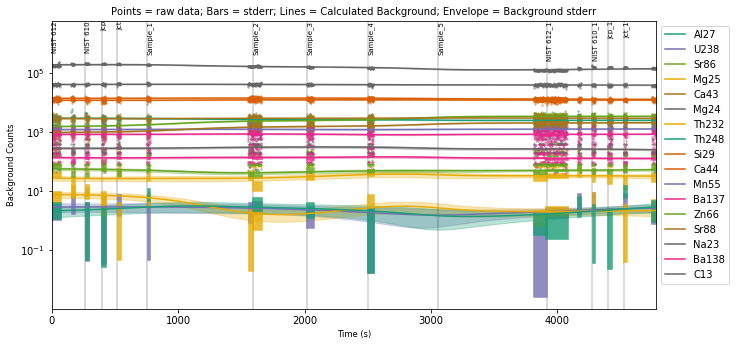

In [10]:
dat.autorange(off_mult=[1, 4.5])
dat.bkg_calc_weightedmean(weight_fwhm=1200)
dat.bkg_plot()

In [11]:
dat.bkg_subtract()
dat.ratio()
dat.calibrate(srms_used=['NIST610', 'NIST612'])

Ratio Calculation: 100%|██████████| 13/13 [00:00<00:00, 14.55it/s]


Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.


Applying Calibrations: 100%|██████████| 13/13 [00:02<00:00,  5.43it/s]


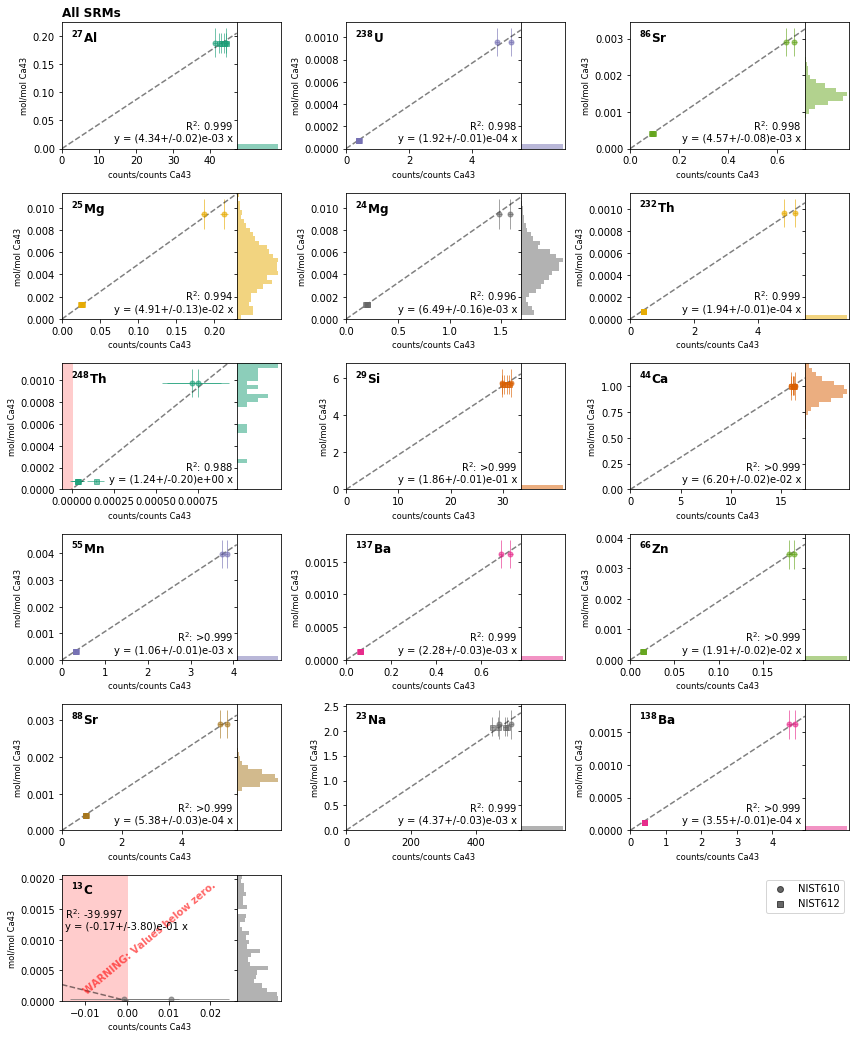

In [12]:
_ = dat.calibration_plot()

## And etc...